In [1]:
import glob
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt
import os
import shutil

Define function for drawing bounding boxes

In [2]:
def draw_bounding_box(image, x1, y1, x2, y2, text=None, colour=(20,20,255), plt_display=False):
    x1 = round(x1)
    x2 = round(x2)
    y1 = round(y1)
    y2 = round(y2)
    
    image = np.ascontiguousarray(image)
    
    image = cv2.rectangle(
                        image, 
                        (x1, y1), 
                        (x2, y2),
                        colour,
                        2,
    )
    if text:
        image = cv2.putText(image, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, colour, 2)
        
    
    if plt_display:
        plt.rcParams['figure.dpi'] = 200
        plt.imshow(image[..., ::-1])

    return image


Load Images and Annotation files

In [3]:
spider_image_filenames = glob.glob("Araneae/*.jpg")
print("Found {} images of spiders!".format(len(spider_image_filenames)))
spider_ann_filenames = glob.glob("Araneae/annotations/*.json")
print("Found {} json files!".format(len(spider_ann_filenames)))

Found 2418 images of spiders!
Found 2418 json files!


View a sample image

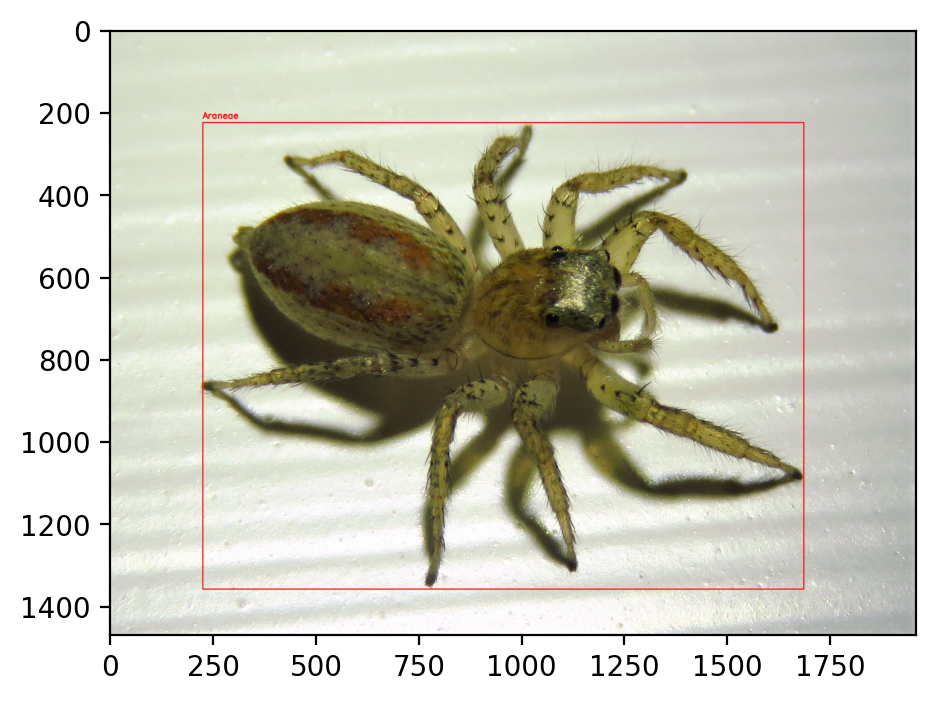

In [4]:
with open("Araneae/annotations/0d281f2b731e781f24a226c5e9d078f5-asset.json", "r") as ann:
    ann = json.load(ann)
    
    # load image
    image = cv2.imread("Araneae/" + ann['asset']['name'])
    
    # Extract B-Box coordinates 
    for region in ann['regions']:
        if not region['tags'][0] == 'Araneae':
            continue
        else:
            x1 = region['boundingBox']['left']
            y1 = region['boundingBox']['top']
            x2 = region['boundingBox']['left'] + region['boundingBox']['width']
            y2 = region['boundingBox']['top'] + region['boundingBox']['height']

            image = draw_bounding_box(image, x1, y1, x2, y2, text=region['tags'][0], plt_display=True)


Count frequency of Bounding Boxes

In [5]:
counts = []
for ann_f in spider_ann_filenames:
    with open(ann_f, "r") as ann:
        ann = json.load(ann)

    # Extract B-Box coordinates 
    count = 0
    for region in ann['regions']:
        if not region['tags'][0] == 'Araneae':
            continue
        else:
            count += 1
    counts.append(count)        
    if count > 4:
        print(ann['asset']['name'])

9038d48a63b6.jpg
2950f991eb6f.jpg
70f885efd179.jpg
eed3d4792231.jpg
b5c240260b0a.jpg


In [6]:
np.bincount(counts)

array([   0, 2383,   27,    3,    0,    0,    1,    0,    1,    0,    1,
          0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    1])

Create .txt file to hold all annotations

In [7]:
with open("all.txt", "w") as file:
    for ann in spider_ann_filenames:
        with open(ann, "r") as ann:
            ann = json.load(ann)
    
        image_name = ann['asset']['name']

        # Extract B-Box coordinates 
        for region in ann['regions']:
            if not region['tags'][0] == 'Araneae':
                continue
            else:
                x1 = region['boundingBox']['left']
                y1 = region['boundingBox']['top']
                x2 = region['boundingBox']['left'] + region['boundingBox']['width']
                y2 = region['boundingBox']['top'] + region['boundingBox']['height']
        
                image_name = image_name + f" {x1},{y1},{x2},{y2},0"
            
        file.write(image_name+"\n")


Create bounding box overlays

In [8]:
# for ann in spider_ann_filenames:
#     with open(ann, "r") as ann:
#         ann = json.load(ann)

#     # load image
#     image = cv2.imread("Araneae/" + ann['asset']['name'])

#     # Extract B-Box coordinates 
#     for region in ann['regions']:
#         if not region['tags'][0] == 'Araneae':
#             continue
#         else:
#             x1 = region['boundingBox']['left']
#             y1 = region['boundingBox']['top']
#             x2 = region['boundingBox']['left'] + region['boundingBox']['width']
#             y2 = region['boundingBox']['top'] + region['boundingBox']['height']

#             image = draw_bounding_box(image, x1, y1, x2, y2, text=region['tags'][0], plt_display=False)
#     cv2.imwrite(f"Overlay/{ann['asset']['name']}", image)